# Plots.jl

## Install

[Plots.jl](https://docs.juliaplots.org/stable/) is not installed by default when Julia is installed.  To ensure it's installed, either run

```julia
using Pkg; Pkg.add("Plots")
```

from the Julia REPL or enter the package manager with `]` and then run

```julia
add Plots
```

## Basic Example

The easiest way to learn Plots.jl is with illustrative examples.

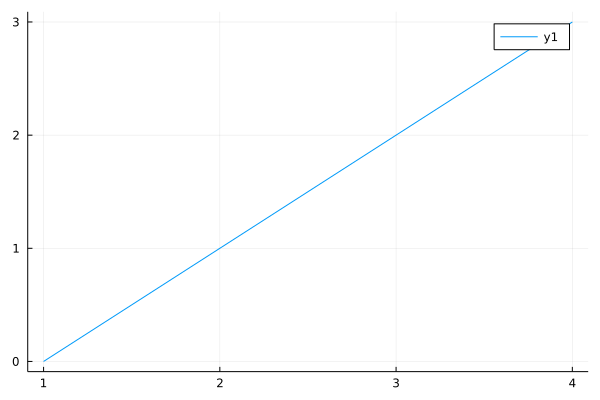

In [1]:
using Plots

plot([0, 1, 2, 3])

### Changing the plot style

There are many options for changing the plot style.  You have ultimate control over the entire look and feel.

The primary way to change the look of the plot is by specifying *attributes*.  A full list of plot attribues is available [here](https://docs.juliaplots.org/stable/attributes/).

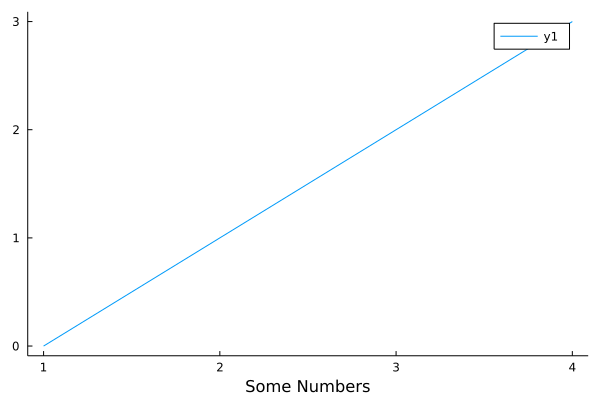

In [2]:
plot([0, 1, 2, 3], xlabel="Some Numbers", grid=false)

### Adding multiple lines

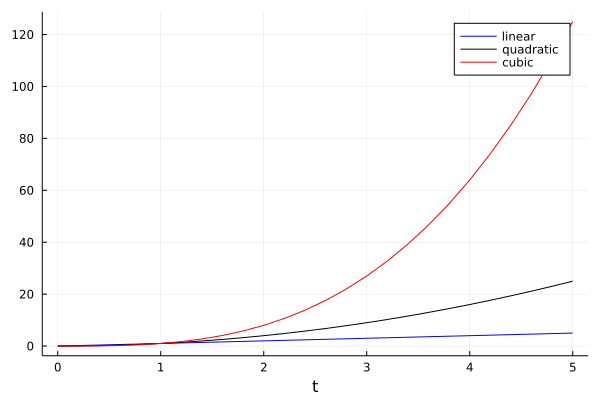

In [3]:
t = 0:0.2:5

plot(t, t, color=:blue, label="linear", xlab="t")
plot!(t, t .^ 2, color="black", label="quadratic")
plot!(t, t .^ 3, color="red", label="cubic")

## Themes

There are many built in plot *themes*.  A full list is available [here](https://docs.juliaplots.org/stable/generated/plotthemes/).

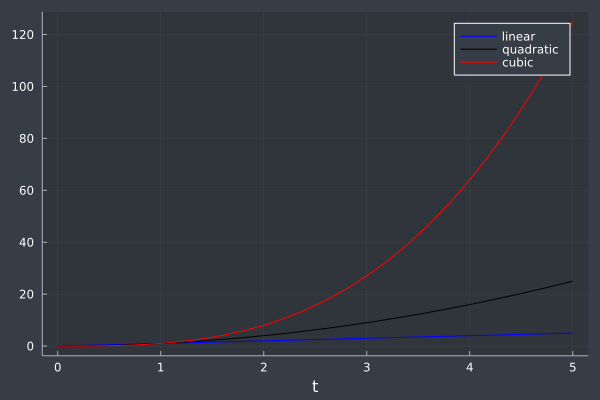

In [4]:
theme(:dark)

t = 0:0.2:5

plot(t, t, color=:blue, label="linear", xlab="t")
plot!(t, t .^ 2, color="black", label="quadratic")
plot!(t, t .^ 3, color="red", label="cubic")

You can add attributes to the `theme` function and those will become the default settings for all plots that follow.

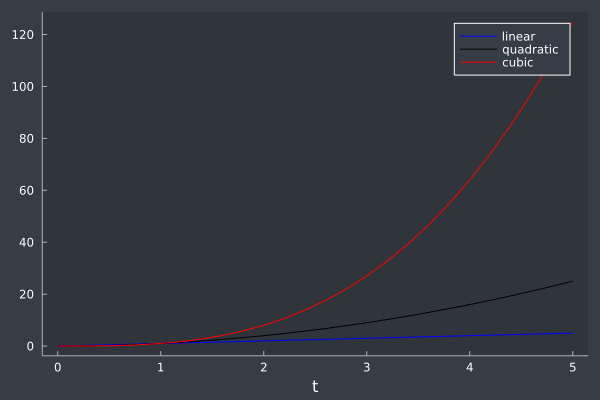

In [5]:
theme(:dark, grid=:false)

t = 0:0.2:5

plot(t, t, color=:blue, label="linear", xlab="t")
plot!(t, t .^ 2, color="black", label="quadratic")
plot!(t, t .^ 3, color="red", label="cubic")

## Subplots / layouts

In [6]:
using CSV
using Tables

data = CSV.File("data/200wells.csv", header=false, skipto=2) |> Tables.matrix
permeability = data[:, 6]
porosity = data[:, 5];

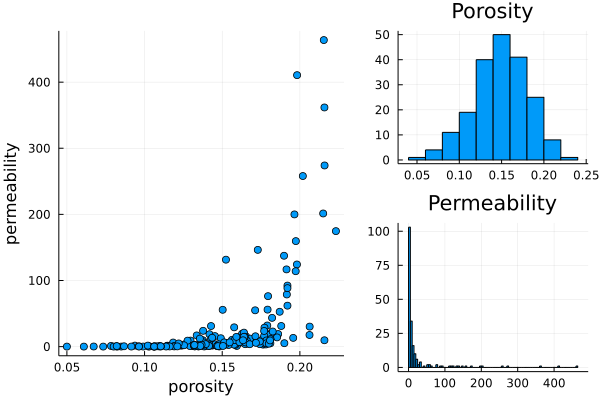

In [7]:
theme(:default, label=nothing)


p1 = scatter(porosity, permeability, xlabel="porosity", ylabel="permeability")
p2 = histogram(porosity, title="Porosity")
p3 = histogram(permeability, title="Permeability")


l = @layout [
    a{0.6w} [b{0.5h}
             c{0.5h}  ]
]
plot(p1, p2, p3, layout=l)

## Contour plots

The following is an example of a filled contour plot in Plots.jl using the command. This figure shows the depth of a petroleum reservoir.

Contour plots must have data that is defined on a rectangular grid in the $(x, y)$ plane.  In the example below, the file `nechelik.npy` has already been organized in this way.  Scattered data must be interpolated onto a rectangular grid.  Any data that has the format of a floating point `NaN` will be shown as white space in the contour plot.

In [8]:
using NPZ

data = npzread("data/nechelik.npy")

X = data[1, :, :]
Y = data[2, :, :]
Z = data[3, :, :];

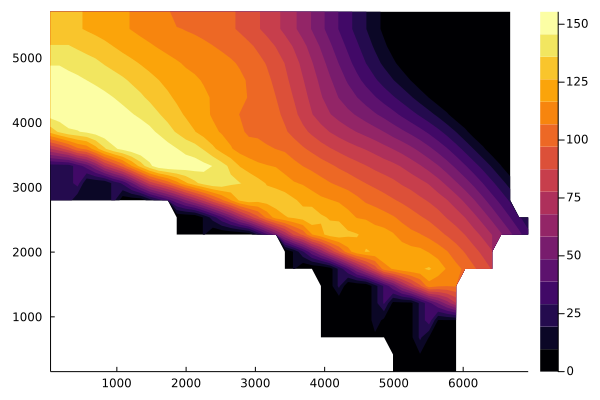

In [9]:
contourf(X[1, :], Y[:, 1], Z, linewidth=0, grid=false)

## Surface plots

The following example is a surface plot; however, the default *backend* [`GR`]([https://docs.juliaplots.org/stable/backends/#[GR]) does not interpolate the surface well.  It's better to use a different backend.

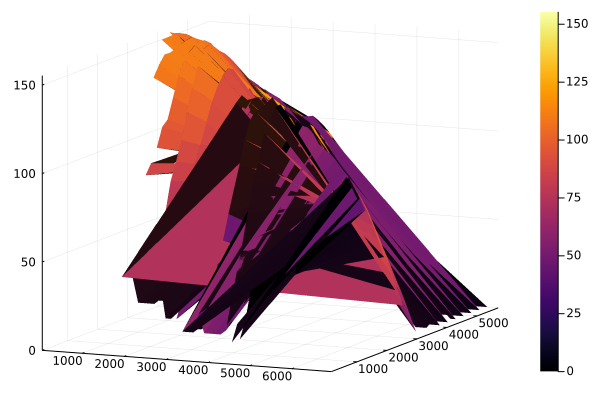

In [10]:
plot(X, Y, Z, st=:surface, display_option=Plots.GR.OPTION_SHADED_MESH)

### Plotly backend

Not only does the Plotly backend interpolate the surface better, it also allows for interactive plots. More information and a full list of backends is available [here](https://docs.juliaplots.org/latest/backends/).

In [11]:
plotlyjs()
plot(X, Y, Z, st=:surface)

WebIO._IJuliaInit()

In [12]:
macro javascript_str(s) display("text/javascript", s); end
javascript"""
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)
"""